# No show appointment Exploration

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>
<a id='intro'></a>

## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

<li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
<li>‘Neighborhood’ indicates the location of the hospital.</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li>Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li> 


### Questions for Analysis
>**Does Waiting Time Cause Absence Of Patients?**

> **Does Age Affect Attendance in appointment?**

>**Does Receiving SMS Affect Attendance?**

In [1]:
# import necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#get cool appearance of graph
sns.set_style("whitegrid")

In [2]:
# Upgrade pandas to use dataframe.explode() function if necessary
if int(pd.__version__.replace('.',''))<25:
    !pip install --upgrade pandas==0.25.0
else: 
    print('No need to upgrade')

No need to upgrade


<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [3]:
# Load data and get some ifo about it
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#show some lines of data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#check for nulls
null_no =df.isnull().sum()
print("Number of nulls is: {}".format(null_no))

Number of nulls is: PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [6]:
#check for duplicate
dupl_no =df.duplicated().sum()
print("Number of duplicate rows is: {}".format(dupl_no))

Number of duplicate rows is: 0



### Data Cleaning
>**To do**:
    <li> Convert PatientId from float to string</li>
    <li> Convert ScheduledDay from string to datetime</li>
    <li> Convert AppointmentDay from string to datetime</li>
    <li> Make data more readable in No-show and SMS_received columns</li>
    <li> Create waiting time column and check for data errors</li>
    <li> Work with age column and check for data errors</li>

In [7]:
#convert PatientId from float to string
df["PatientId"]= df["PatientId"].astype(str)

In [8]:
#convert ScheduledDay from string to datetime
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])

In [9]:
#convert ScheduledDay from string to datetime
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

In [10]:
#check data types
df.dtypes

PatientId                      object
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [11]:
#get data more readable in No-show column
df["No-show"]= df["No-show"].replace("No","Attended")
df["No-show"]= df["No-show"].replace("Yes","Didn't attended")

In [12]:
#get data more readable in No-show column
df["SMS_received"]= df["SMS_received"].replace(0,"Didn't receive SMS")
df["SMS_received"]= df["SMS_received"].replace(1,"Received SMS")

In [13]:
#check for changed
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,Didn't receive SMS,Attended
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,Didn't receive SMS,Attended
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,Didn't receive SMS,Attended
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,Didn't receive SMS,Attended
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,Didn't receive SMS,Attended


In [14]:
# get new column to calculate waiting time
df["waiting_time"] = (df["AppointmentDay"].dt.date -df["ScheduledDay"].dt.date).dt.days
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,Didn't receive SMS,Attended,0


In [15]:
#show some statistics about waiting time
df["waiting_time"].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_time, dtype: float64

There rows that have wrong rows that have wrong dates that result in negative 

In [16]:
# delete un logic rows
unlogic_dates = df.query("waiting_time<0")
unlogic_dates_indeces = np.array(unlogic_dates.index)
df.drop(labels=unlogic_dates_indeces, inplace=True)

In [17]:
#check statistics after removal
df["waiting_time"].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_time, dtype: float64

In [18]:
#get some statistics about age
df["Age"].describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

There rows that have wrong rows that have wrong age that result in negative

In [19]:
unlogic_ages = df.query("Age<=0")
unlogic_age_indeces = np.array(unlogic_ages.index)
df.drop(labels=unlogic_age_indeces, inplace=True)

In [20]:
#check statistics after removal
df["Age"].describe()

count    106982.000000
mean         38.316315
std          22.466023
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

In [21]:
def graph_bar(df, col, xlabel, normalize=True):
    '''Takes column and build graph related to No-show
    inputs: df    -> dataframe
            col   -> column to filter by
            xlabel-> x axis label
    output: bar chart of relation between column and No-show
    '''
    #filter data
    relation = df.groupby([col])["No-show"].value_counts(normalize=normalize).unstack("No-show");
    #plot data
    relation.plot(kind="bar", color=["green","red"], fontsize='12', figsize=[13,4])
    #adding labels to make graph more readable
    plt.ylabel("Attendence", fontsize='18')
    plt.xlabel(xlabel, fontsize='18')
    plt.title("Attendance in appointment and {}".format(xlabel).title(), fontsize='18')
    sns.despine()

In [22]:
def proportion_pie(df, col, prop, normalize=True):
    '''Takes column and build bar chart related to No-show
    inputs: df    -> dataframe
            col   -> column to filter by
            prop  -> value to get prportion of it
            xlabel-> x axis label
    output: pie chart of No-show proportion according to column filter
    '''
    #filter data
    relation = df.groupby([col])["No-show"].value_counts(normalize=normalize).unstack("No-show");
    #add columns to calculate propotion
    relation["total"]= relation["Attended"]+relation["Didn't attended"]
    relation["proportion_a"] = round(100*relation["Attended"]/relation["total"],2)
    relation["proportion_d"] = round(100*relation["Didn't attended"]/relation["total"],2)
    #select values to plot
    r = np.array([relation.loc[prop,"proportion_a"], relation.loc[prop,"proportion_d"]])
    #prepare labels for plotting
    l = np.vectorize(lambda x: str(x)+"%")
    label = l(r) 
    #ploting
    plt.pie(r,labels=label,explode=[0,0.2],colors=["green","red"])
    plt.title("Attendance Percentage For People Who {}".format(prop), fontsize="18")
    plt.legend(["Attended","Didn't Attend"]);

<a id='eda'></a>
## Exploratory Data Analysis

### Does Waiting Time Cause Absence Of Patients?

In [23]:
# divide waiting time to get better visualization
bins = [-1,0,4,14,179]
bin_name = ["less than day", "1 to 4 days", "4 to 14 days", "more than 14"]
df['wait'] = pd.cut(df['waiting_time'], bins, labels=bin_name)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time,wait
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,Didn't receive SMS,Attended,0,less than day


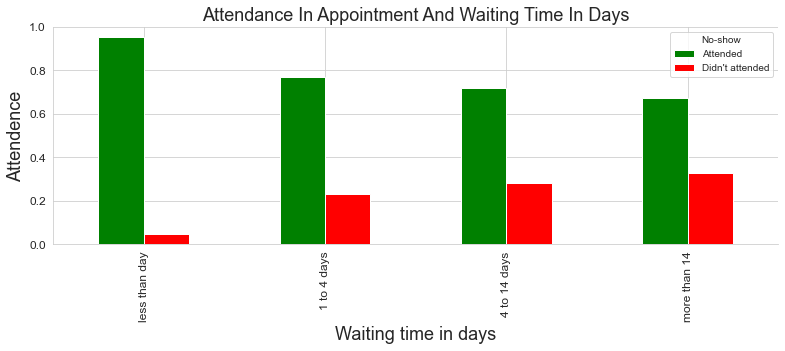

In [24]:
#visualize relation
graph_bar(df, "wait", "Waiting time in days", normalize=True)

From previous steps we conclude that absence increase with the increase of waiting time

### Does Age Affect Attendance in appointment?

In [25]:
# divide age to get better visualization
bins = [1,19,38,56,115]
bin_name = ["less than 19 years", "19 to 38 years", "38 to 56 years", "more than 56"]
df['age_g'] = pd.cut(df['Age'], bins, labels=bin_name)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time,wait,age_g
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,Didn't receive SMS,Attended,0,less than day,more than 56


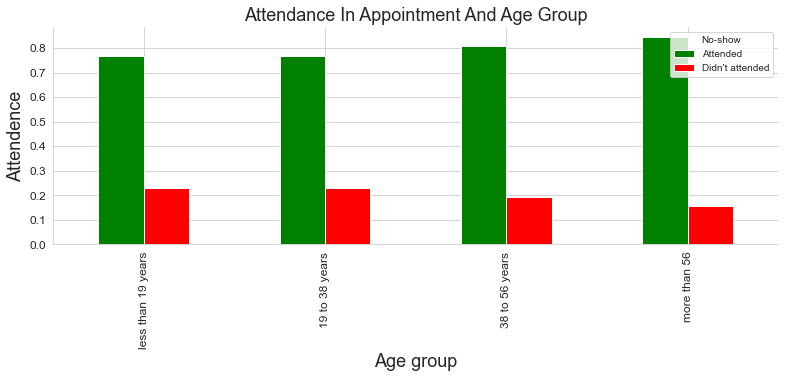

In [26]:
graph_bar(df, "age_g", "Age group", normalize=True)

From previous steps age doesn't affect absence

### Does Receiving SMS Affect Attendance?

In [27]:
#get a galance on sending SMS efficiency
sms_count = df["SMS_received"].value_counts()
sms_percent=sms_count.apply(lambda x:round(100*x/df["SMS_received"].count(),2))

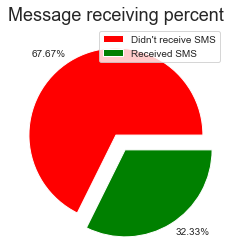

In [29]:
#visualize percentage message sent percentage
plt.pie(sms_percent,labels=[str(sms_percent.loc["Didn't receive SMS"])+"%",str(sms_percent.loc["Received SMS"])+"%"],explode=[0,0.2],colors=["red","green"])
plt.title("Message receiving percent", fontsize="18")
plt.legend(["Didn't receive SMS","Received SMS"]);

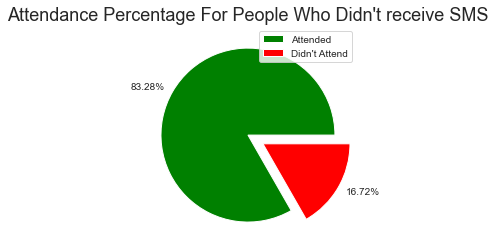

In [29]:
#visualize percentage incase didn't receive message
proportion_pie(df, "SMS_received", "Didn't receive SMS")

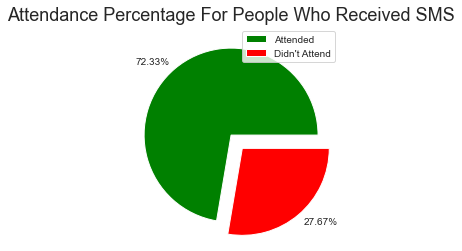

In [30]:
#visualize percentage incase received message
proportion_pie(df, "SMS_received", "Received SMS")

From provided data, it seems thatsending SMS doesn't increase presence. There is increase in abscence in case of sending SMS

<a id='conclusions'></a>
## Conclusions

> **The longer waiting time, the higher absence frequency**

> **Age doesn't Affect presence of patients**

> **SMS system needs to be improved as only 32.33%  received message and  even people received message showed higher absence percent**

### Limitations
> **Data is unconsistant** 

> **Data lack some useful detials such as reason of absence distance from hospital to home**